In [ ]:
!pip install Mastodon.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mastodon 
from mastodon import Mastodon 
import numpy as np 
import os 
import pandas as pd 
from matplotlib import pyplot as plt 
import networkx as nx

In [ ]:
m= Mastodon(access_token = 	'eTunZVjjC8_2N3bkcF0OMOYgPfqEOHzdg3UJ7msQjnA',
    api_base_url = 'https://mastodon.social')

In [ ]:
# Set date for trending tags search
import datetime

from time import sleep 
hashtag_data = []
for i in range(100): 
  hashtag_data.append(m.trending_tags())
  sleep(20)
  print(f"{i} iteration done!")



0 iteration done!
1 iteration done!
2 iteration done!
3 iteration done!
4 iteration done!
5 iteration done!
6 iteration done!
7 iteration done!
8 iteration done!
9 iteration done!
10 iteration done!
11 iteration done!
12 iteration done!
13 iteration done!


MastodonNetworkError: ignored

In [ ]:
print(len(hashtag_data))

50


In [ ]:
hashtags = [] 
accounts = []
uses = [] 
for i in range(len(hashtag_data)): 
  for info in hashtag_data[0]: 
    hashtags.append((info.get('name')))
    uses.append(info['history'][0].get('uses'))

  

In [ ]:
print(len(uses))

500


In [ ]:
# Create a dictionary from the lists using zip()
dictionary = dict(zip(hashtags, uses))


In [ ]:
df_hashs = pd.DataFrame()
df_hashs["hashtags"] = hashtags
df_hashs["uses"] = uses

In [ ]:
final_hash= list(set(hashtags))
print(len(final_hash))

10


In [ ]:
df_final = pd.DataFrame()
df_final["hashtags"] = final_hash

In [ ]:
hashtag_toots = [] 

for hash in final_hash: 
    hashtag_toots.append(m.timeline_hashtag(hash))


In [ ]:
df_final["toot details"] = hashtag_toots

In [ ]:
users = [] 
for d, row in df_final.iterrows(): 
  users.append((row["toot details"][0].get('account').get('id')))

In [ ]:
followers = [] 
for user in users: 
  followers.append(m.account_followers(str(user)))

In [ ]:
df_final["followers"] = followers

In [ ]:
following = [] 
for user in users: 
  following.append(m.account_following(str(user)))

In [ ]:
df_final["following"] = following

In [ ]:
df_final

,hashtags,toot details,followers,following
0,lyricalmasterpieces,"[{'id': 110317990660333283, 'created_at': 2023...","[{'id': 109371010876960470, 'username': 'DZGri...","[{'id': 110266162634306901, 'username': 'arste..."
1,WindowFriday,"[{'id': 110318041430372829, 'created_at': 2023...","[{'id': 110167067154850043, 'username': 'Nooga...","[{'id': 110167067154850043, 'username': 'Nooga..."
2,fursuitfriday,"[{'id': 110318099468592917, 'created_at': 2023...","[{'id': 110219380817626623, 'username': 'nerod...","[{'id': 110219380817626623, 'username': 'nerod..."
3,BandcampFriday,"[{'id': 110318102503473354, 'created_at': 2023...",[],[]
4,starwarsaclassicmovie,"[{'id': 110317878025889408, 'created_at': 2023...","[{'id': 456183, 'username': 'mikedunn', 'acct'...","[{'id': 109259296548994894, 'username': 'Missi..."
5,JukeboxFridayNight,"[{'id': 110318038731080567, 'created_at': 2023...",[],[]
6,Fensterfreitag,"[{'id': 110318106076052169, 'created_at': 2023...","[{'id': 109878474102216399, 'username': 'dmart...","[{'id': 109876167851411515, 'username': 'trend..."
7,cincodemayo,"[{'id': 110318100943843208, 'created_at': 2023...","[{'id': 109909566600115210, 'username': 'mrsco...","[{'id': 109756976051940649, 'username': 'stupi..."
8,vendredilecture,"[{'id': 110318079383313960, 'created_at': 2023...","[{'id': 32668, 'username': 'fabi1cazenave', 'a...","[{'id': 32668, 'username': 'fabi1cazenave', 'a..."
9,tgif,"[{'id': 110318092406867614, 'created_at': 2023...","[{'id': 110054947988430380, 'username': 'radov...","[{'id': 109312832238383140, 'username': 'katch..."


In [ ]:
df_final = df_final.drop(3)

In [ ]:
df_final = df_final.drop(5)

In [ ]:
df_final.head()

,hashtags,toot details,followers,following
0,lyricalmasterpieces,"[{'id': 110317990660333283, 'created_at': 2023...","[{'id': 109371010876960470, 'username': 'DZGri...","[{'id': 110266162634306901, 'username': 'arste..."
1,WindowFriday,"[{'id': 110318041430372829, 'created_at': 2023...","[{'id': 110167067154850043, 'username': 'Nooga...","[{'id': 110167067154850043, 'username': 'Nooga..."
2,fursuitfriday,"[{'id': 110318099468592917, 'created_at': 2023...","[{'id': 110219380817626623, 'username': 'nerod...","[{'id': 110219380817626623, 'username': 'nerod..."
4,starwarsaclassicmovie,"[{'id': 110317878025889408, 'created_at': 2023...","[{'id': 456183, 'username': 'mikedunn', 'acct'...","[{'id': 109259296548994894, 'username': 'Missi..."
6,Fensterfreitag,"[{'id': 110318106076052169, 'created_at': 2023...","[{'id': 109878474102216399, 'username': 'dmart...","[{'id': 109876167851411515, 'username': 'trend..."


In [ ]:
user_list = df_final["followers"]

followers_id = []
for item in user_list:
    if isinstance(item, list) and all(isinstance(elem, dict) and 'id' in elem for elem in item):
        followers_id.append([elem['id'] for elem in item])
    elif isinstance(item, dict) and 'id' in item:
        followers_id.append(item['id'])

In [ ]:
user_list2 = df_final["following"]

following_id = []
for item in user_list2:
    if isinstance(item, list) and all(isinstance(elem, dict) and 'id' in elem for elem in item):
        following_id.append([elem['id'] for elem in item])
    elif isinstance(item, dict) and 'id' in item:
        following_id.append(item['id'])

In [ ]:
df_final["follower ids"] = followers_id
df_final["following ids"] = following_id

In [ ]:
df_final

,hashtags,toot details,followers,following,follower ids,following ids
0,lyricalmasterpieces,"[{'id': 110317990660333283, 'created_at': 2023...","[{'id': 109371010876960470, 'username': 'DZGri...","[{'id': 110266162634306901, 'username': 'arste...","[109371010876960470, 396284, 10839012468499342...","[110266162634306901, 109297267936822269, 10968..."
1,WindowFriday,"[{'id': 110318041430372829, 'created_at': 2023...","[{'id': 110167067154850043, 'username': 'Nooga...","[{'id': 110167067154850043, 'username': 'Nooga...","[110167067154850043, 108772405993602191, 11014...","[110167067154850043, 109856201017382355, 23479..."
2,fursuitfriday,"[{'id': 110318099468592917, 'created_at': 2023...","[{'id': 110219380817626623, 'username': 'nerod...","[{'id': 110219380817626623, 'username': 'nerod...","[110219380817626623, 110141867641812043, 11009...","[110219380817626623, 110141867641812043]"
4,starwarsaclassicmovie,"[{'id': 110317878025889408, 'created_at': 2023...","[{'id': 456183, 'username': 'mikedunn', 'acct'...","[{'id': 109259296548994894, 'username': 'Missi...","[456183, 110160959680597683, 945880, 109984662...","[109259296548994894, 454842, 10819345638470212..."
6,Fensterfreitag,"[{'id': 110318106076052169, 'created_at': 2023...","[{'id': 109878474102216399, 'username': 'dmart...","[{'id': 109876167851411515, 'username': 'trend...","[109878474102216399, 110238656414466451, 11025...","[109876167851411515, 233670, 10925079640340214..."
7,cincodemayo,"[{'id': 110318100943843208, 'created_at': 2023...","[{'id': 109909566600115210, 'username': 'mrsco...","[{'id': 109756976051940649, 'username': 'stupi...","[109909566600115210, 109913829104871608, 11013...","[109756976051940649, 109362444413306972, 10988..."
8,vendredilecture,"[{'id': 110318079383313960, 'created_at': 2023...","[{'id': 32668, 'username': 'fabi1cazenave', 'a...","[{'id': 32668, 'username': 'fabi1cazenave', 'a...","[32668, 109245282227031852, 109250716074159749...","[32668, 233670, 44440, 109244623527927045, 109..."
9,tgif,"[{'id': 110318092406867614, 'created_at': 2023...","[{'id': 110054947988430380, 'username': 'radov...","[{'id': 109312832238383140, 'username': 'katch...","[110054947988430380, 109257083424636770, 10924...",[109312832238383140]


In [ ]:
df_final['Number of Followers'] = df_final['follower ids'].apply(len)
df_final['Number of Followings'] = df_final['following ids'].apply(len)

In [ ]:
df_final

,hashtags,toot details,followers,following,follower ids,following ids,Number of Followers,Number of Followings
0,lyricalmasterpieces,"[{'id': 110317990660333283, 'created_at': 2023...","[{'id': 109371010876960470, 'username': 'DZGri...","[{'id': 110266162634306901, 'username': 'arste...","[109371010876960470, 396284, 10839012468499342...","[110266162634306901, 109297267936822269, 10968...",15,31
1,WindowFriday,"[{'id': 110318041430372829, 'created_at': 2023...","[{'id': 110167067154850043, 'username': 'Nooga...","[{'id': 110167067154850043, 'username': 'Nooga...","[110167067154850043, 108772405993602191, 11014...","[110167067154850043, 109856201017382355, 23479...",40,40
2,fursuitfriday,"[{'id': 110318099468592917, 'created_at': 2023...","[{'id': 110219380817626623, 'username': 'nerod...","[{'id': 110219380817626623, 'username': 'nerod...","[110219380817626623, 110141867641812043, 11009...","[110219380817626623, 110141867641812043]",4,2
4,starwarsaclassicmovie,"[{'id': 110317878025889408, 'created_at': 2023...","[{'id': 456183, 'username': 'mikedunn', 'acct'...","[{'id': 109259296548994894, 'username': 'Missi...","[456183, 110160959680597683, 945880, 109984662...","[109259296548994894, 454842, 10819345638470212...",23,28
6,Fensterfreitag,"[{'id': 110318106076052169, 'created_at': 2023...","[{'id': 109878474102216399, 'username': 'dmart...","[{'id': 109876167851411515, 'username': 'trend...","[109878474102216399, 110238656414466451, 11025...","[109876167851411515, 233670, 10925079640340214...",40,22
7,cincodemayo,"[{'id': 110318100943843208, 'created_at': 2023...","[{'id': 109909566600115210, 'username': 'mrsco...","[{'id': 109756976051940649, 'username': 'stupi...","[109909566600115210, 109913829104871608, 11013...","[109756976051940649, 109362444413306972, 10988...",40,40
8,vendredilecture,"[{'id': 110318079383313960, 'created_at': 2023...","[{'id': 32668, 'username': 'fabi1cazenave', 'a...","[{'id': 32668, 'username': 'fabi1cazenave', 'a...","[32668, 109245282227031852, 109250716074159749...","[32668, 233670, 44440, 109244623527927045, 109...",40,40
9,tgif,"[{'id': 110318092406867614, 'created_at': 2023...","[{'id': 110054947988430380, 'username': 'radov...","[{'id': 109312832238383140, 'username': 'katch...","[110054947988430380, 109257083424636770, 10924...",[109312832238383140],4,1


In [ ]:
import csv
import networkx as nx
import ast 
filename = 'FollowerFinal.csv'
output = []
G = nx.Graph()
# open the CSV file and read each row
with open('HashFollowerFinal.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', skipinitialspace=True)
    next(csv_reader, None)  # skip header
    for row in csv_reader:
        target_list = ast.literal_eval(row[2])
        for target in target_list:
            output.append([row[1], str(target)])

In [ ]:
G.add_edges_from(output)

In [ ]:
output2= []
with open('HashFollowingFinal.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', skipinitialspace=True)
    next(csv_reader, None)  # skip header
    for row in csv_reader:
        target_list = ast.literal_eval(row[2])
        for target in target_list:
            output2.append([row[1], str(target)])

In [ ]:
G.add_edges_from(output2)

In [ ]:
G.number_of_nodes()

342

In [ ]:
G.number_of_edges()

349

In [ ]:
connected_comp = list(nx.connected_components(G))
l_cc = max(connected_comp, key=len)
sub_graph = G.subgraph(l_cc)

In [ ]:
# Get the degree sequence of the graph
degree_sequence = [d for n, d in sub_graph.degree()]

# Calculate the degree distribution as a dictionary
degree_distribution = {}
for degree in degree_sequence:
    if degree in degree_distribution:
        degree_distribution[degree] += 1
    else:
        degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
n_nodes = sub_graph.number_of_nodes()
for degree in degree_distribution:
    degree_distribution[degree] /= n_nodes

In [ ]:
degree_distribution

{42: 0.0030120481927710845,
 1: 0.9427710843373494,
 2: 0.03313253012048193,
 64: 0.0030120481927710845,
 3: 0.006024096385542169,
 43: 0.0030120481927710845,
 60: 0.0030120481927710845,
 67: 0.0030120481927710845,
 65: 0.0030120481927710845}

In [ ]:
timeline_data = pd.read_csv('Timeline_data.csv')
timeline_data = timeline_data.drop(["Unnamed: 0"], axis=1)

In [ ]:
df_random = timeline_data.sample(n=7000, random_state=42)

In [ ]:
from mastodon.media import MastodonAPIError
post_ids = df_random["Post id"]
status_reblogged_by_id = [] 
for i in range(0, len(post_ids)):
  try: 
    status_reblogged_by_id.append(m.status_reblogged_by(str(post_ids[i]))) 
  except: 
    status_reblogged_by_id.append('0')

In [ ]:
df_random["toot reblog details"] = status_reblogged_by_id

In [ ]:
df_new = df_random[df_random['toot reblog details'] != '0']

In [ ]:
df_new2 = df_new[df_new['toot reblog details'].apply(lambda x: len(x)) > 0]

In [ ]:
df_new2

,Source User id,Source Username,Post id,toot reblog details
5272,109956450497135672,riadsb,110248989324234911,"[{'id': 110247763830671684, 'username': 'jarek..."
9930,110249082037999006,Dexter666,110249152625195275,"[{'id': 110010770814237500, 'username': 'fotbo..."
4949,108399158663389582,oonishiyoshikazu,110248978181712680,"[{'id': 109325122562830634, 'username': 'Kenny..."
3337,109832884388312174,djxspeedy,110248923978810381,"[{'id': 109311607475281635, 'username': 'angel..."
3465,109251428687235255,Zehavoc,110248925905945468,"[{'id': 109552937136523889, 'username': 'ruthl..."
...,...,...,...,...
7512,107374594614902666,karatekid,110249065651348427,"[{'id': 109331994992911002, 'username': 'snoow..."
5410,110248908432910380,zackbook,110248997770257394,"[{'id': 108195613849723859, 'username': 'geolo..."
4536,109246863390341857,broadwayworld,110248966265194879,"[{'id': 109376302454934066, 'username': 'NoahS..."
4378,109865255676549332,lokan,110248960361500650,"[{'id': 110261937211360293, 'username': 'CTGT'..."


In [ ]:
reblogger_list = df_new2["toot reblog details"]

reblogger_id = []
for item in reblogger_list:
    if isinstance(item, list) and all(isinstance(elem, dict) and 'id' in elem for elem in item):
        reblogger_id.append([elem['id'] for elem in item])
    elif isinstance(item, dict) and 'id' in item:
        reblogger_id.append(item['id'])

In [ ]:
df_new2["reblogger ids"] = reblogger_id

<ipython-input-12-387e207b487c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2["reblogger ids"] = reblogger_id


In [ ]:
df_new2.head() 

,Source User id,Source Username,Post id,toot reblog details,reblogger ids
5272,109956450497135672,riadsb,110248989324234911,"[{'id': 110247763830671684, 'username': 'jarek...",[110247763830671684]
9930,110249082037999006,Dexter666,110249152625195275,"[{'id': 110010770814237500, 'username': 'fotbo...","[110010770814237500, 110004488279938467, 10928..."
4949,108399158663389582,oonishiyoshikazu,110248978181712680,"[{'id': 109325122562830634, 'username': 'Kenny...",[109325122562830634]
3337,109832884388312174,djxspeedy,110248923978810381,"[{'id': 109311607475281635, 'username': 'angel...","[109311607475281635, 109949336425730536]"
3465,109251428687235255,Zehavoc,110248925905945468,"[{'id': 109552937136523889, 'username': 'ruthl...","[109552937136523889, 109430043145370587, 10924..."


In [ ]:
reblog = df_new2[["Source User id", "reblogger ids"]]
reblog.to_csv("tootReblog.csv")

In [ ]:
import csv
import ast 
filename = 'tootReblog.csv'
output = []
G = nx.Graph()
# open the CSV file and read each row
with open('tootReblog.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', skipinitialspace=True)
    next(csv_reader, None)  # skip header
    for row in csv_reader:
        target_list = ast.literal_eval(row[2])
        for target in target_list:
            output.append([row[1], str(target)])

In [ ]:
G.add_edges_from(output)

In [ ]:
G.number_of_nodes()

1447

In [ ]:
connected_comp = list(nx.connected_components(G))
l_cc = max(connected_comp, key=len)
sub_graph = G.subgraph(l_cc)

In [ ]:
sub_graph.number_of_nodes()

1394

In [ ]:
# Get the degree sequence of the graph
degree_sequence = [d for n, d in sub_graph.degree()]

# Calculate the degree distribution as a dictionary
degree_distribution = {}
for degree in degree_sequence:
    if degree in degree_distribution:
        degree_distribution[degree] += 1
    else:
        degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
n_nodes = sub_graph.number_of_nodes()
for degree in degree_distribution:
    degree_distribution[degree] /= n_nodes

Text(0, 0.5, 'Distribution')

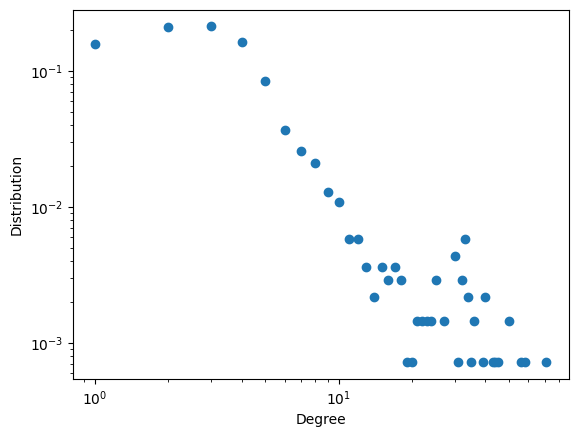

In [ ]:
plt.scatter(list(degree_distribution.keys()), list(degree_distribution.values()))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Distribution")

In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import powerlaw
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit


In [ ]:
print(fit.power_law.alpha)

3.116248927382447


<Axes: >

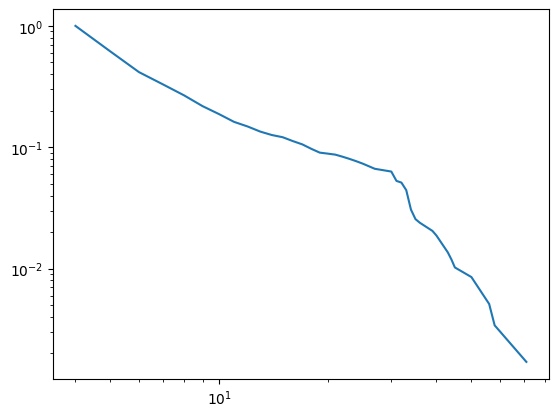

In [ ]:
fit.plot_ccdf()

In [ ]:
from mastodon.media import MastodonAPIError
post_ids = timeline_data["Post id"]
status_faved_by_id = [] 
for i in range(0, len(post_ids)):
  try: 
    status_faved_by_id.append(m.status_favourited_by(str(post_ids[i]))) 
  except: 
    status_faved_by_id.append('0')

In [ ]:
timeline_data["faved id"] = status_faved_by_id

In [ ]:
faved = timeline_data[["Post id", ["faved id"]]]
faved.to_csv("tootfaved.csv")